In [1]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import datetime as dt
from tabulate import tabulate
import matplotlib.pyplot as plt
path = r".\\DataSet\\"
import seaborn as sns
import statsmodels.api as sm

In [9]:
allMadrid = pd.read_csv(path+"out.csv")
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d %H:%M:%S')
allMadrid=allMadrid.groupby(['date']).mean()
#index = pd.DatetimeIndex(allMadrid['date'])
#allMadrid.index = index
display(allMadrid)

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
date,,,,,,,,,,,,,
2008-01-01 01:00:00,2.111250,1.192083,1.963750,0.522000,11.820078,94.703462,5.049583,106.588749,57.855000,30.4964,1.933000,7.543750,2.807902e+07
2008-01-01 02:00:00,2.705000,1.201250,2.237500,0.412000,11.820078,94.996538,4.968000,125.566924,61.555000,25.9028,1.786000,9.366250,2.807902e+07
2008-01-01 03:00:00,1.841250,0.909583,1.613750,0.320000,11.820078,78.414230,5.091200,90.754616,39.211250,19.9772,1.606000,6.032500,2.807902e+07
2008-01-01 04:00:00,1.415000,0.793333,1.020000,0.298000,11.820078,71.075384,4.989200,44.526539,38.873750,16.5884,1.538000,4.236250,2.807902e+07
2008-01-01 05:00:00,1.238750,0.753333,0.917500,0.320000,11.820078,67.167308,4.935417,37.135769,25.625000,15.7836,1.582000,3.898750,2.807902e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-30 20:00:00,0.283333,0.240000,0.150000,0.063333,5.083333,25.666667,81.428571,7.307692,4.333333,4.2000,1.310000,0.533333,2.807904e+07
2018-04-30 21:00:00,0.350000,0.250000,0.216667,0.063333,4.708333,31.750000,72.571429,9.153846,4.333333,4.4000,1.313333,0.866667,2.807904e+07
2018-04-30 22:00:00,0.316667,0.250000,0.200000,0.063333,4.083333,30.333333,67.571429,8.076923,4.666667,4.5000,1.313333,0.716667,2.807904e+07


<AxesSubplot: xlabel='date'>

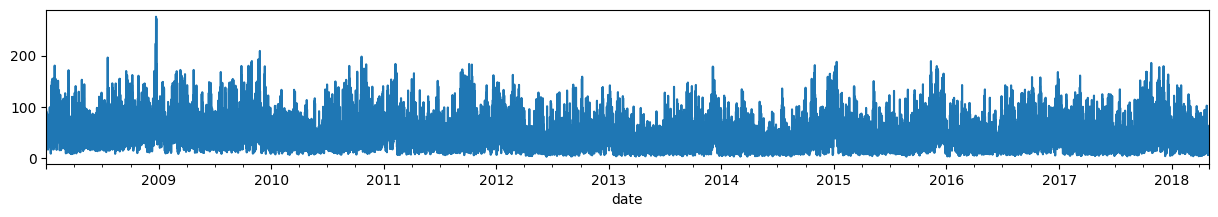

In [10]:
#index = pd.DatetimeIndex(allMadrid['date'])
#no2Tab=pd.DataFrame({'NO2':allMadrid['NO_2']},index=index)
#display(no2Tab)
forNo2 = allMadrid['NO_2']
forNo2.plot(figsize=(15, 2))

Ora creiamo il modello per le previsioni. 
Il modello scelto è un AR(1), e lo costruiremo grazie alla classe `SARIMAX` di statsmodels.
Poi stimiamo i suoi parametri con il metodo `fit`. 
Infine con il metodo `summary` produrremo le diverse tabelle che mostrano i risultati.

In [39]:
# Construct the model
mod = sm.tsa.SARIMAX(forNo2, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    NO2   No. Observations:                   11
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -40.382
Date:                Mon, 28 Nov 2022   AIC                             86.764
Time:                        17:45:27   BIC                             87.958
Sample:                             0   HQIC                            86.012
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.9604     11.783      1.270      0.204      -8.134      38.055
ar.L1          0.1206      0.715      0.169      0.866      -1.280       1.521
sigma2        90.2891     48.661      1.855      0.0

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast(steps=5)

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

NO2       mean   mean_se  mean_ci_lower  mean_ci_upper
11   17.973752  9.502056       2.344261      33.603243
12   17.127726  9.570885       1.385021      32.870432
13   17.025712  9.571882       1.281366      32.770057
14   17.013410  9.571897       1.269041      32.757780
15   17.011927  9.571897       1.267557      32.756297


d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


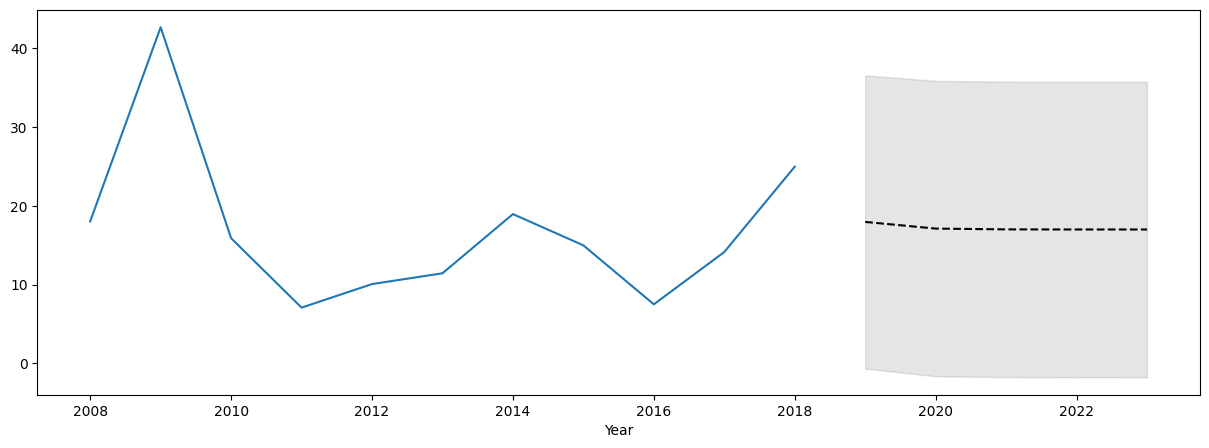

In [74]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
#forNo2.reset_index()
forNo2.loc[0:].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast(steps=5).summary_frame()
fcast['mean'].index=fcast['mean'].index+2008
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index+2008, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

<AxesSubplot: >

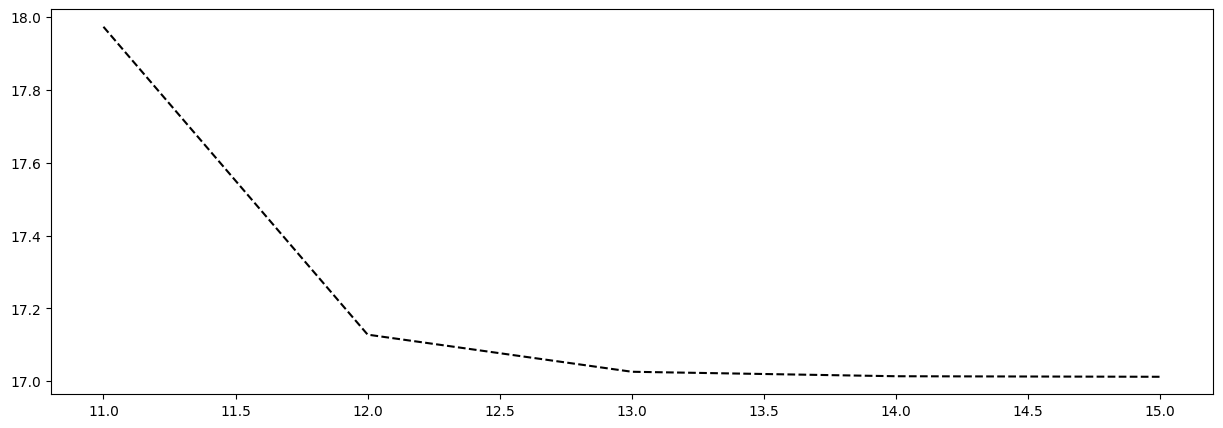

In [56]:
fig, ax = plt.subplots(figsize=(15, 5))
fcast['mean'].plot(ax=ax, style='k--')